In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
lv1_data = pd.read_csv(r'I:\Data\Personal Data\graduation project\SACOL\microwave\\2009\200902\2009-02-05_00-02-03_lv1.csv',index_col='Record')
# lv1_data.drop(['Unnamed: 23'],axis=1,inplace=True)

In [3]:
# cols = lv1_data.columns[2:6].append(lv1_data.columns[9:22])
# n = 31
# for col in cols:
#     y = np.convolve(pd.to_numeric(lv1_data[col]),np.ones((n,))/n,mode='full')
#     y[:n-1] = np.nan
#     lv1_data[col] = y[:-(n-1)]

以下是绘图部分

In [4]:
## 绘图准备
# 坐标值（1）
flag = 0
x_ticks = []
x_labels = []
for time in range(len(lv1_data['Date/Time'])):
    if(flag != lv1_data['Date/Time'][time+1][9:11]):
        flag = lv1_data['Date/Time'][time+1][9:11]
        x_ticks.append(time)
        x_labels.append(lv1_data['Date/Time'][time+1][9:14])

x_ticks.append(len(lv1_data['Date/Time'])-1)
x_labels.append(lv1_data['Date/Time'][len(lv1_data['Date/Time'])][9:14])
# 坐标值（2）
for i in range(8):
    del x_labels[slice(i+1,i+3)]
    del x_ticks[slice(i+1,i+3)]
print(x_labels,'\n',x_ticks)

# 字体设置
config = {  "font.family": 'serif',
            "font.size": 15,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
rcParams.update(config)

['0:03', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00', '23:58'] 
 [0, 177, 357, 537, 717, 897, 1077, 1257, 1435]


In [5]:
lv1_data.columns

Index(['Date/Time', '10', 'Tamb(K)', 'Rh(%)', 'Pres(mb)', 'Tir(K)', 'Rain',
       'Azim', 'Elev', 'TkBB(K)', '22.235', '23.035', '23.835', '26.235', '30',
       '51.25', '52.28', '53.85', '54.94', '56.66', '57.29', '58.8'],
      dtype='object')

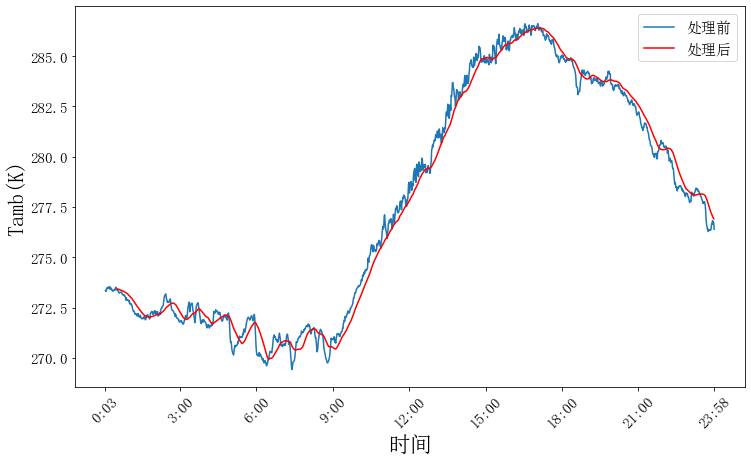

In [13]:
# col = lv1_data.columns[16]
col = 'Tamb(K)'
n = 30
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.figure(figsize=(12,7))
plt.plot(lv1_data[col],label='处理前')
y = np.convolve(pd.to_numeric(lv1_data[col]),np.ones(n,)/n,mode='full')
y[:n-1] = np.nan
plt.plot(y[:-(n-1)],'r',label='处理后')
plt.legend()
plt.xticks(x_ticks,x_labels,rotation=45)
plt.xlabel('时间',fontsize=22)
plt.ylabel(col,fontsize=22)
# plt.savefig(r'I:\Data\Personal Data\graduation project\毕业论文\毕业论文图集\Chapter5\20090603_'+col+'.svg',bbox_inches='tight',dpi=300,pad_inches=0)
plt.show()